<a href="https://colab.research.google.com/github/Yunis-9121/CliniScanc_Lung-Abnormality/blob/main/yunis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 23.0 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import pandas as pd

In [ ]:
def dicom_to_png(dicom_path, png_path):
    dcm = pydicom.dcmread(dicom_path)
    img = dcm.pixel_array
    img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    cv2.imwrite(png_path, img)

def convert_dataset(dicom_dir, out_dir, csv_annotations):
    os.makedirs(out_dir, exist_ok=True)
    annots = pd.read_csv(csv_annotations)

    for i, row in annots.iterrows():
        dicom_file = os.path.join(dicom_dir, row['image_id'] + ".dicom")
        png_file = os.path.join(out_dir, row['image_id'] + ".png")
        dicom_to_png(dicom_file, png_file)


In [ ]:
import torch
from torch.utils.data import Dataset
from PIL import Image

class CXRClassificationDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = Image.open(self.images[idx]).convert("RGB")
        label = torch.tensor(self.labels[idx], dtype=torch.float32)
        if self.transform:
            img = self.transform(img)
        return img, label

In [ ]:
import torch.nn as nn
import torchvision.models as models

def build_resnet(num_classes):
    model = models.resnet50(pretrained=True)
    in_features = model.fc.in_features
    model.fc = nn.Sequential(
        nn.Linear(in_features, 512),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(512, num_classes),
        nn.Sigmoid()   # multilabel output
    )
    return model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

from google.colab import drive

try:
    drive.mount('/content/drive', force_remount=True)
    print("Google Drive mounted successfully.")
except Exception as e:
    print(f"Failed to mount Google Drive: {e}")

import zipfile
import os

zip_path = "/content/drive/MyDrive/infosys intern/infosys intren/Train.zip"
extract_path = "/content/dataset"


if not os.path.exists(extract_path) or not os.listdir(extract_path):
    os.makedirs(extract_path, exist_ok=True)
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(f" Dataset extracted to: {extract_path}")
    except Exception as e:
        print(f" Failed to unzip dataset: {e}")
else:
    print(f"ℹ️ Dataset already extracted at: {extract_path}")


print("📂 Extracted dataset structure (first 40 lines):")
!ls -R /content/dataset | head -40


Mounted at /content/drive
Google Drive mounted successfully.
 Failed to unzip dataset: [Errno 2] No such file or directory: '/content/drive/MyDrive/infosys intern/infosys intren/Train.zip'
📂 Extracted dataset structure (first 40 lines):
/content/dataset:


In [ ]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.9 MB/s eta 0:00:00


In [ ]:
import os
import torch
from ultralytics import YOLO
from google.colab import drive
import zipfile

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:

print("Torch version:", torch.__version__)
print("GPU available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU name:", torch.cuda.get_device_name(0))

drive.mount('/content/drive', force_remount=True)

zip_path = "/content/drive/MyDrive/infosys intern/infosys intren/Train.zip"
extract_path = "/content/dataset"

if not os.path.exists(extract_path) or not os.listdir(extract_path):
    os.makedirs(extract_path, exist_ok=True)
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(f"✅ Dataset extracted to: {extract_path}")
    except Exception as e:
        print(f"❌ Failed to unzip dataset: {e}")
else:
    print(f"ℹ️ Dataset already extracted at: {extract_path}")

dataset_dir = "/content/dataset/chest_xray/chest_xray"

if not (os.path.exists(os.path.join(dataset_dir, "train")) and
        os.path.exists(os.path.join(dataset_dir, "val"))):
    raise ValueError(f"❌ Expected 'train' and 'val' inside {dataset_dir}, but not found!")

print("✅ Using dataset:", dataset_dir)
!ls -R $dataset_dir | head -40


model = YOLO("yolov8n-cls.pt")

model.train(
    data=dataset_dir,
    epochs=20,
    imgsz=224,
    batch=32,
    name="chest_xray_cls"
)

metrics = model.val(data=dataset_dir)
print("Validation metrics:", metrics)

print("Best model saved at:", model.ckpt_path)


Torch version: 2.8.0+cu126
GPU available: False
Mounted at /content/drive
ℹ️ Dataset already extracted at: /content/dataset
✅ Using dataset: /content/dataset/chest_xray/chest_xray
/content/dataset/chest_xray/chest_xray:
test
train
val

/content/dataset/chest_xray/chest_xray/test:
NORMAL
PNEUMONIA

/content/dataset/chest_xray/chest_xray/test/NORMAL:
IM-0001-0001.jpeg
IM-0003-0001.jpeg
IM-0005-0001.jpeg
IM-0006-0001.jpeg
IM-0007-0001.jpeg
IM-0009-0001.jpeg
IM-0010-0001.jpeg
IM-0011-0001-0001.jpeg
IM-0011-0001-0002.jpeg
IM-0011-0001.jpeg
IM-0013-0001.jpeg
IM-0015-0001.jpeg
IM-0016-0001.jpeg
IM-0017-0001.jpeg
IM-0019-0001.jpeg
IM-0021-0001.jpeg
IM-0022-0001.jpeg
IM-0023-0001.jpeg
IM-0025-0001.jpeg
IM-0027-0001.jpeg
IM-0028-0001.jpeg
IM-0029-0001.jpeg
IM-0030-0001.jpeg
IM-0031-0001.jpeg
IM-0033-0001-0001.jpeg
IM-0033-0001-0002.jpeg
IM-0033-0001.jpeg
IM-0035-0001.jpeg
IM-0036-0001.jpeg
IM-0037-0001.jpeg
Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
eng

📂 Available experiments: ['chest_xray_cls', 'chest_xray_cls2']
✅ Using results from: /content/runs/classify/chest_xray_cls2
❌ Training Results not found
📊 Showing Confusion Matrix


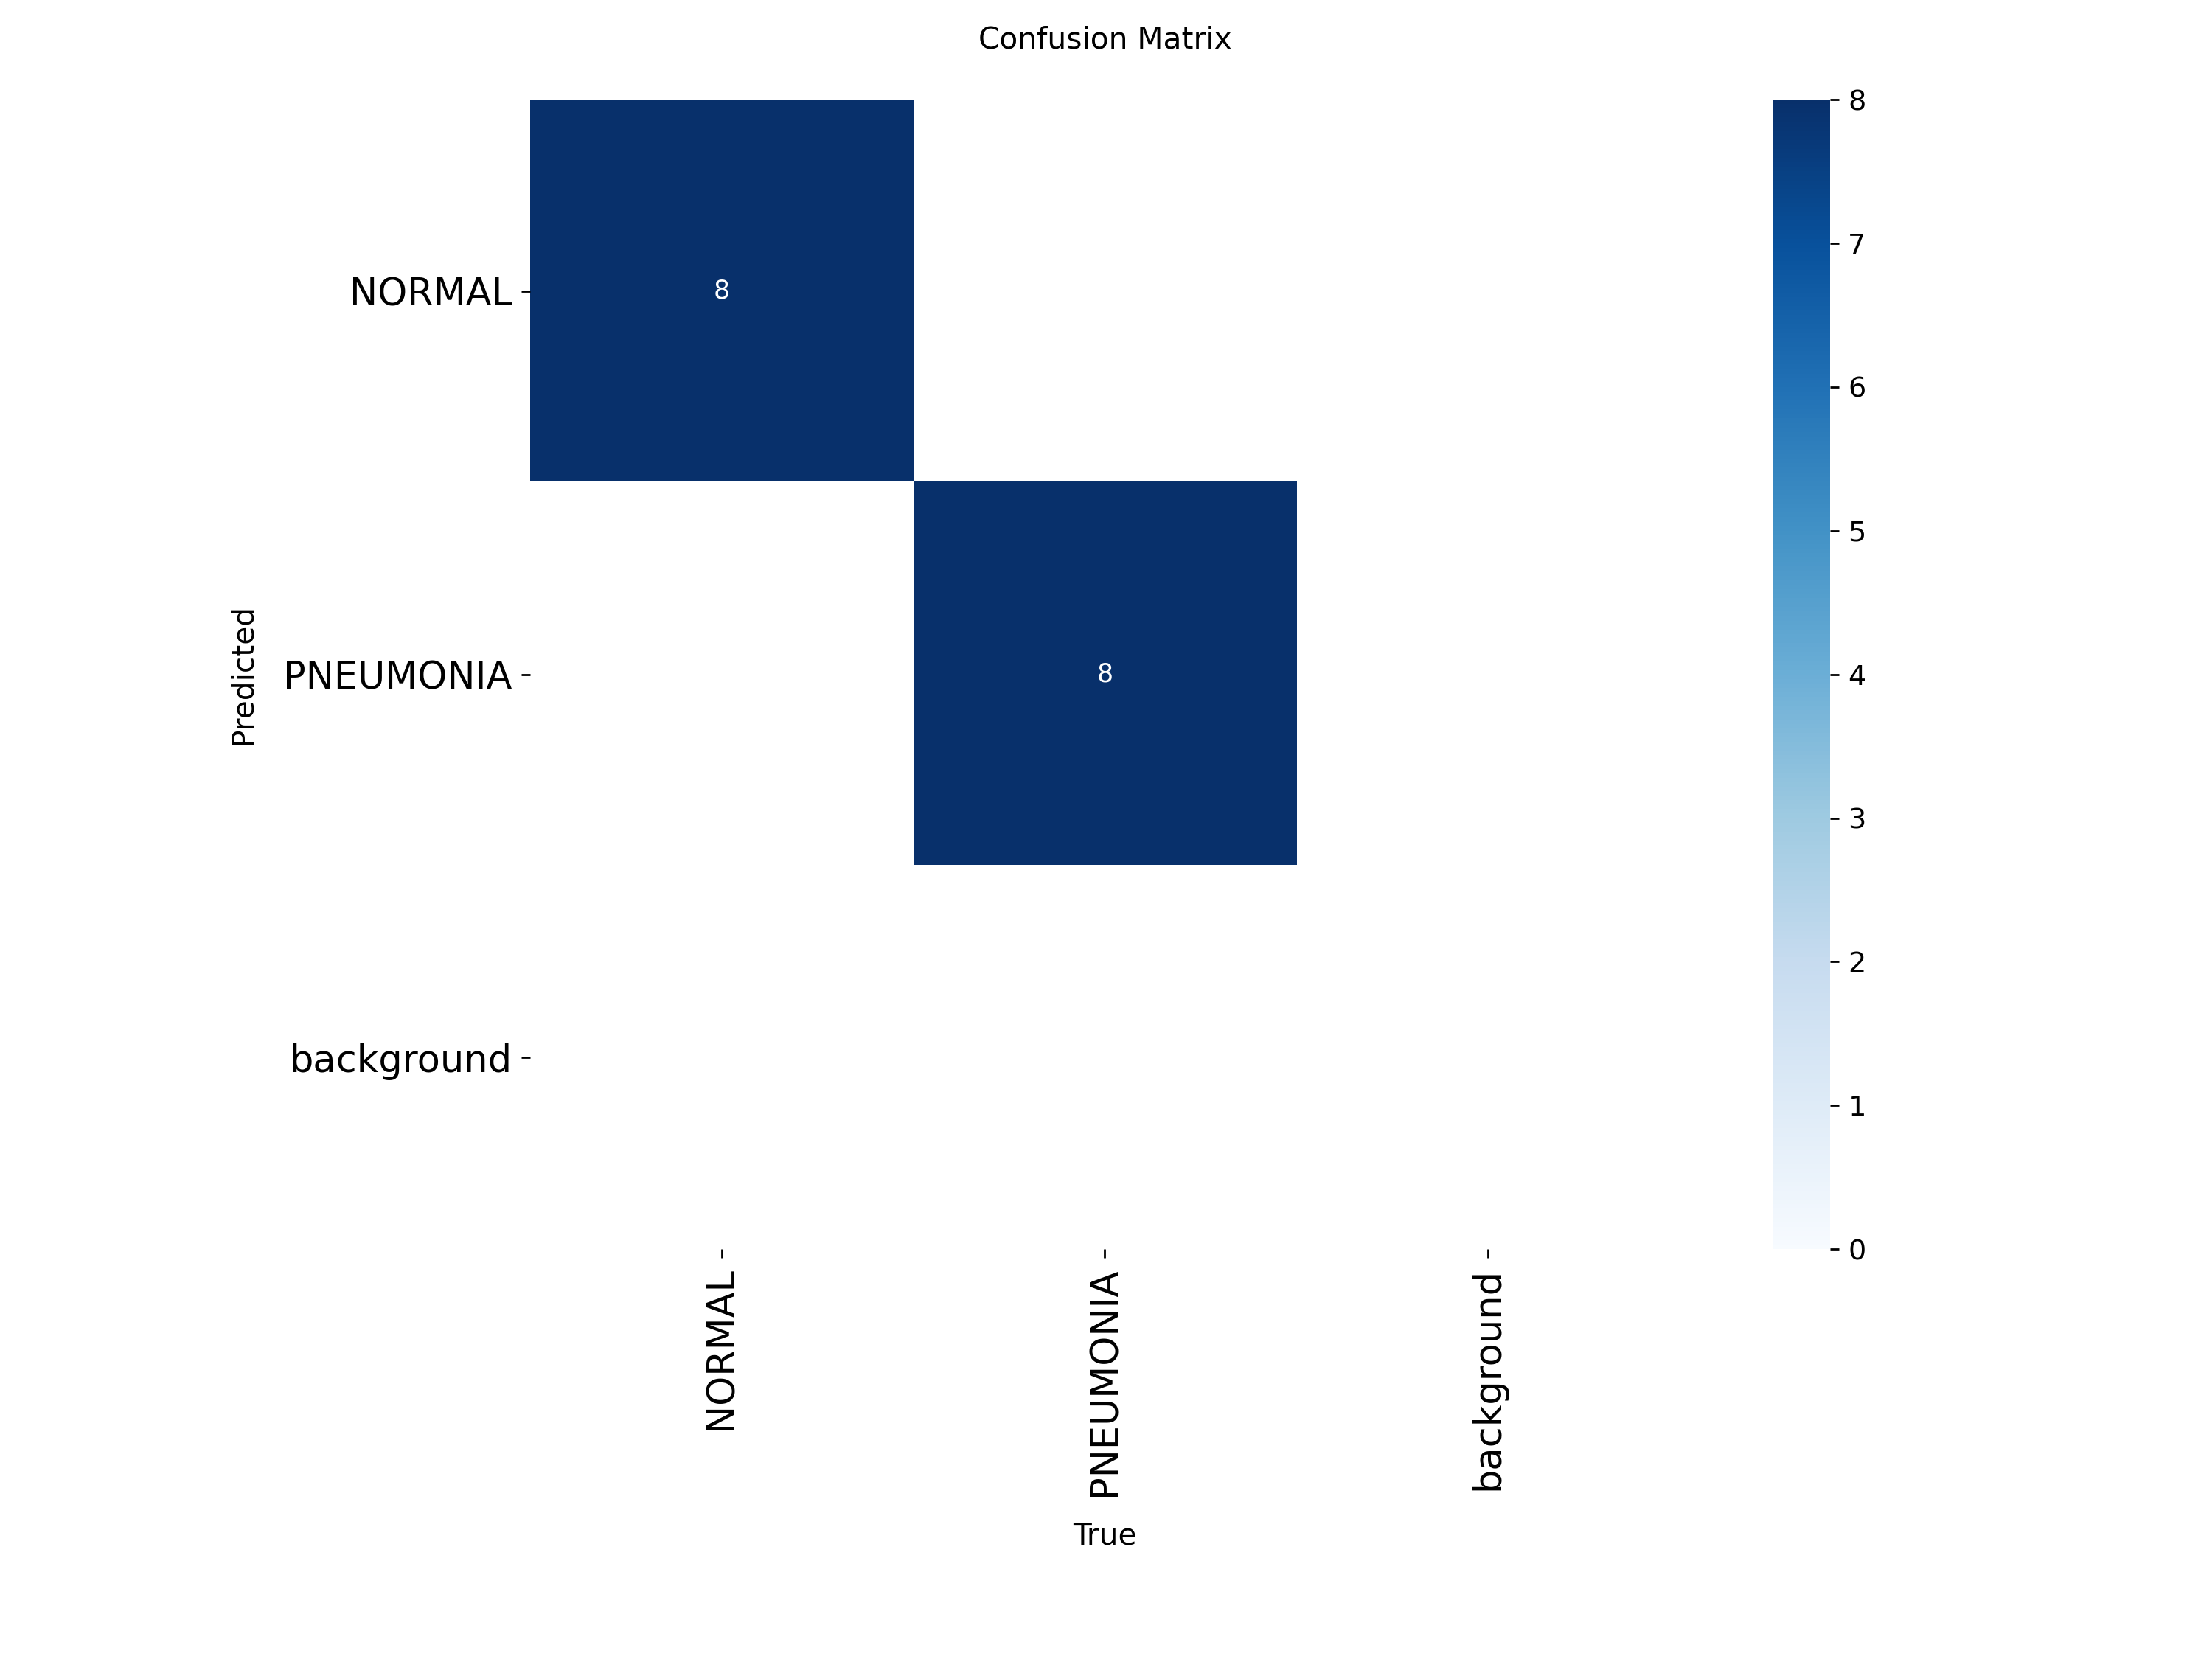

📊 Showing Normalized Confusion Matrix


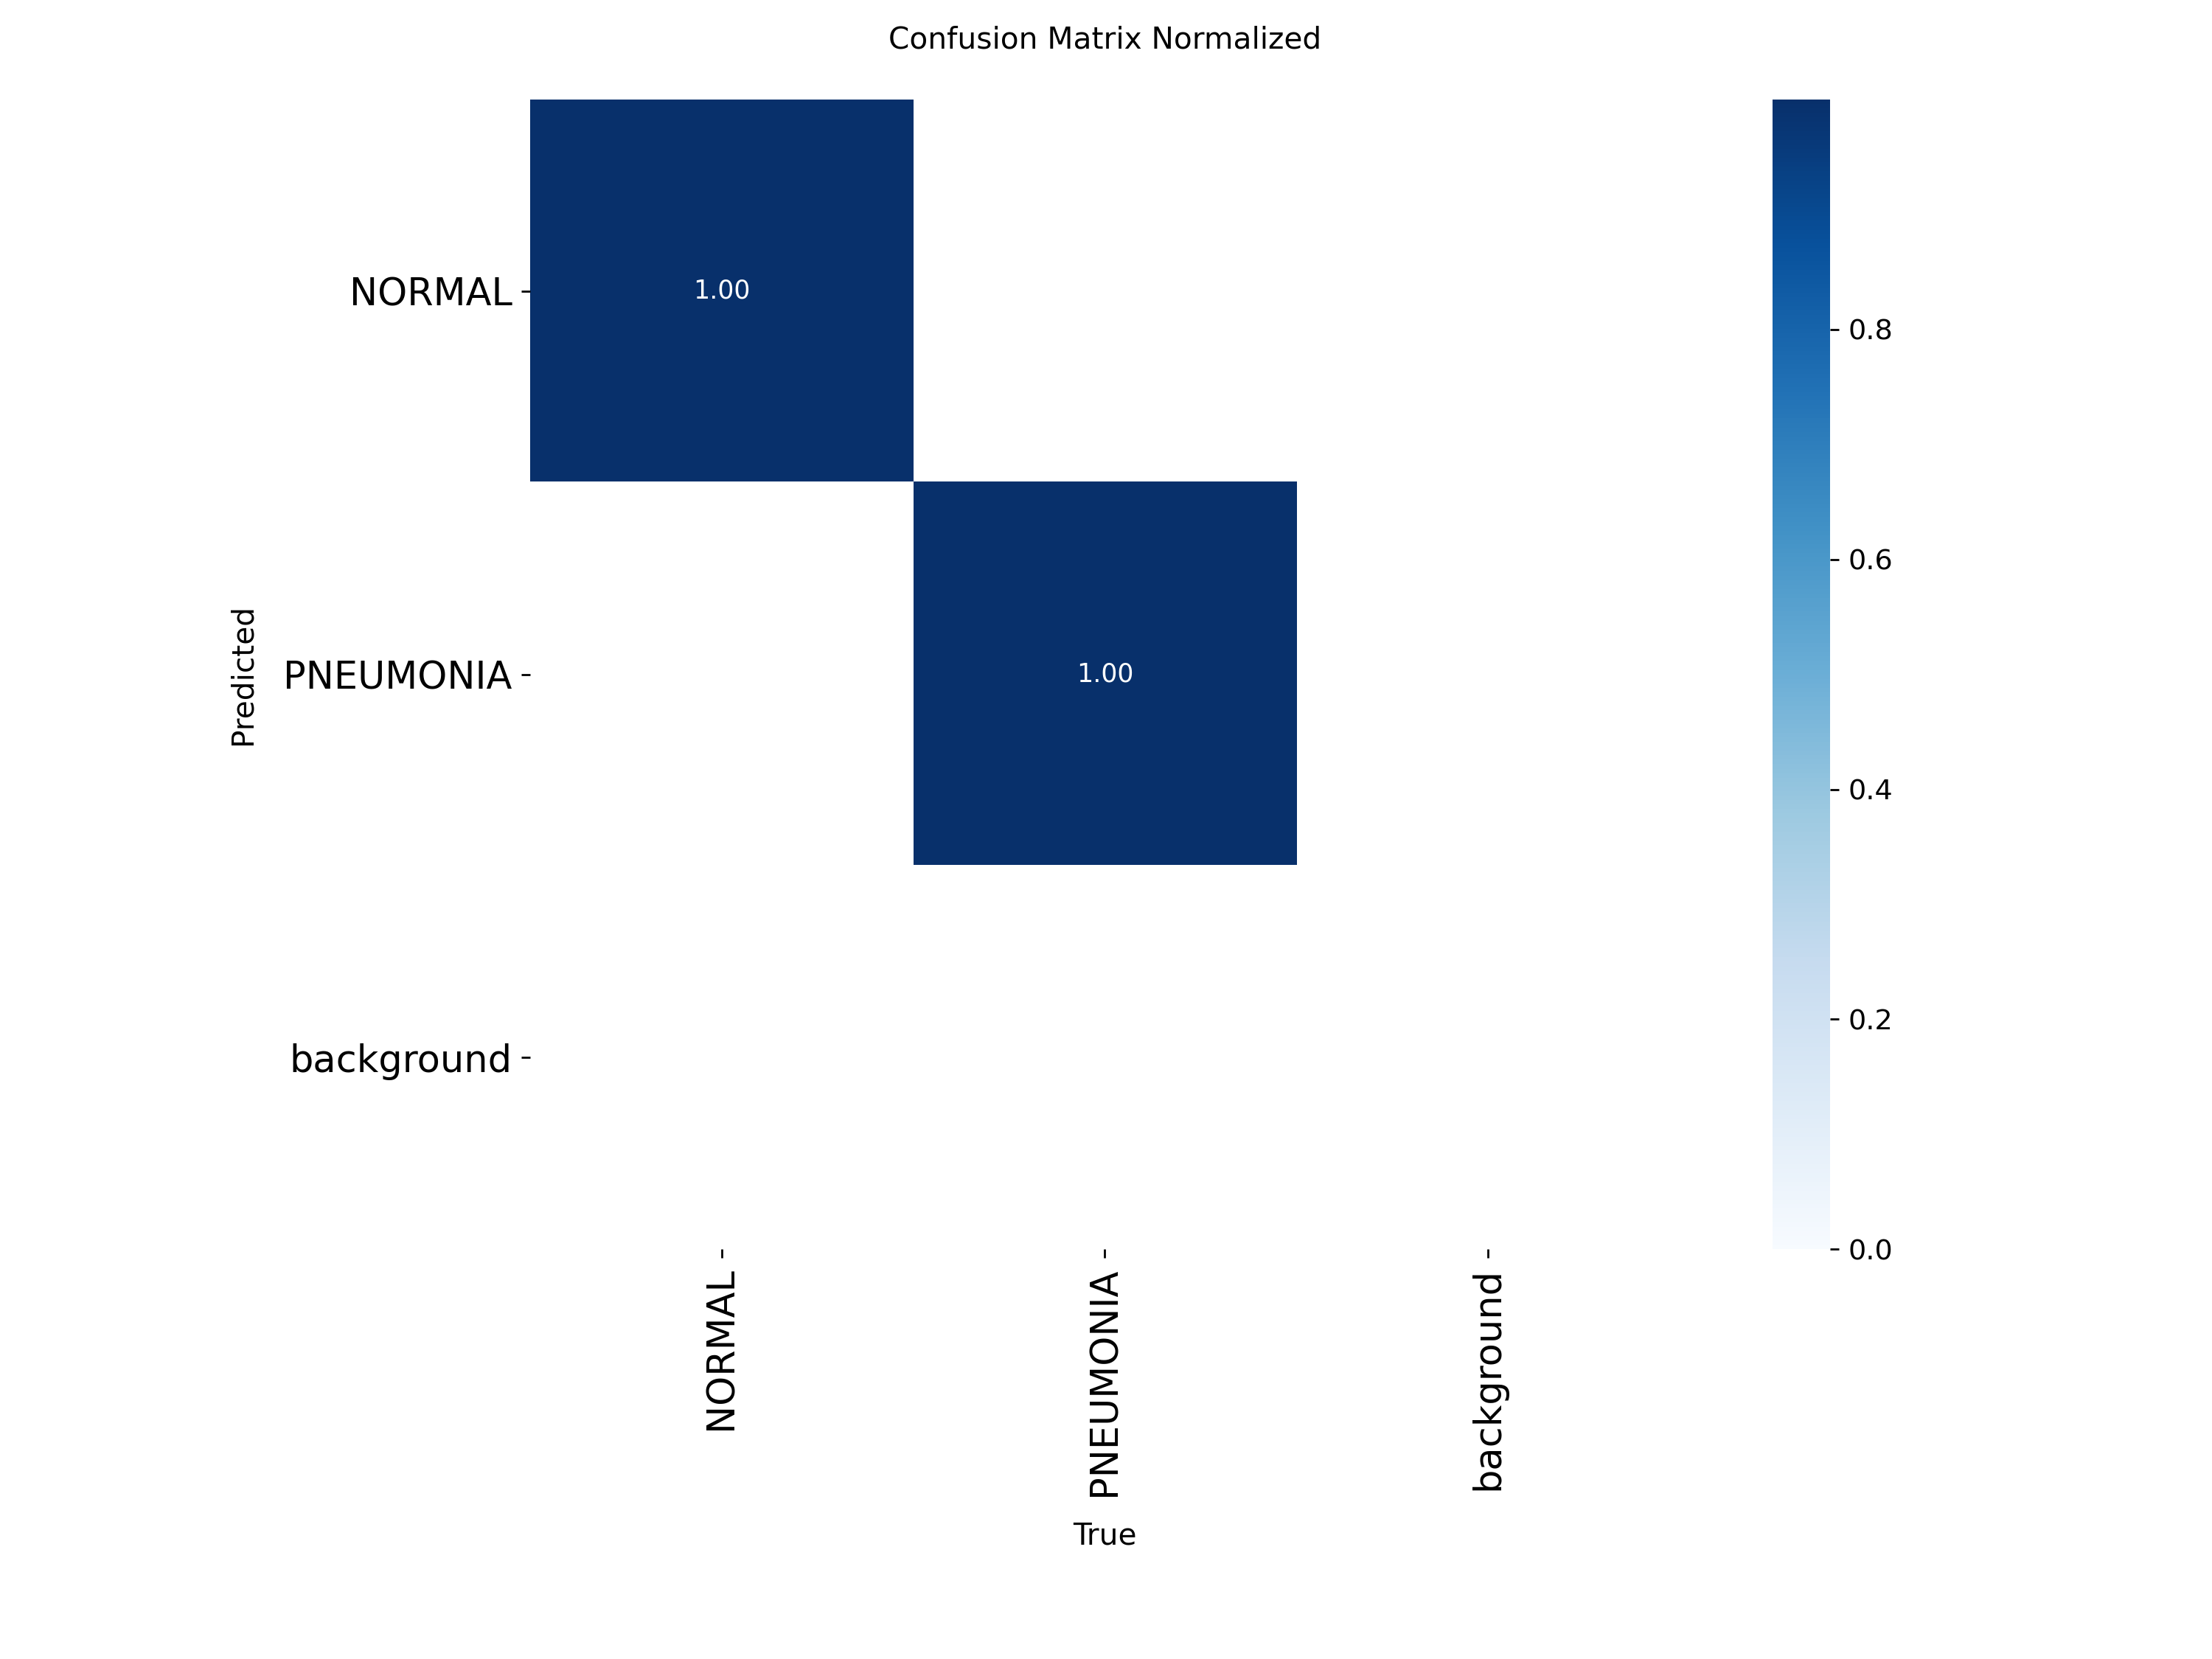

📊 Showing Validation Predictions


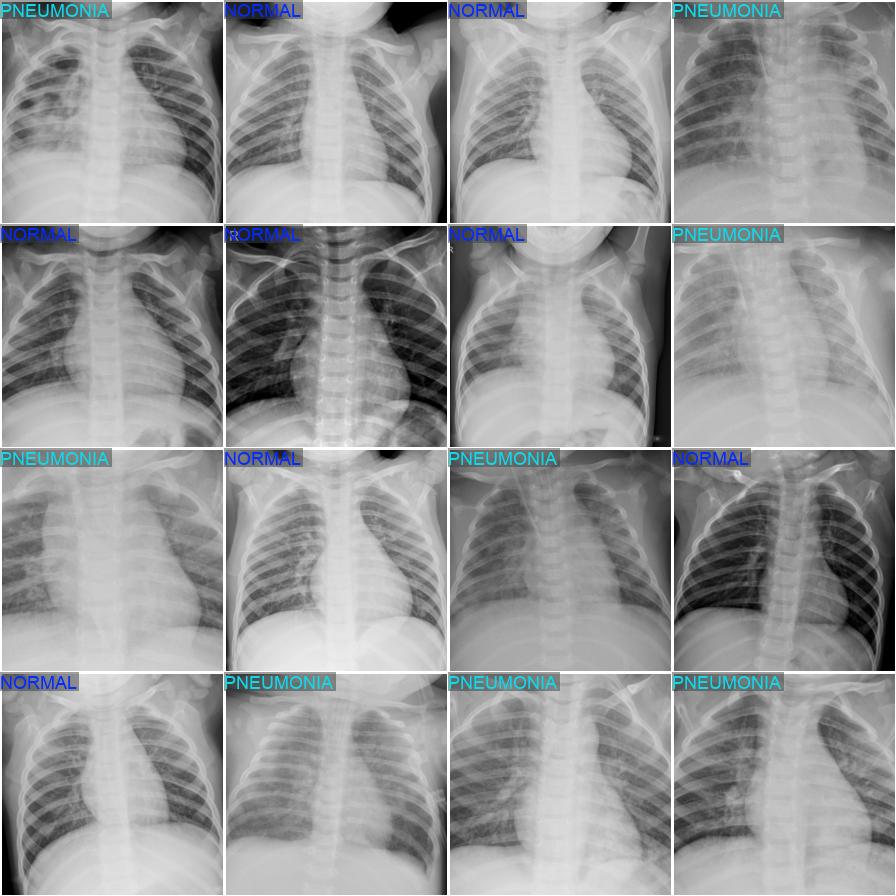

In [ ]:
from IPython.display import Image, display
import os

base_dir = "/content/runs/classify"
exp_list = sorted(os.listdir(base_dir))
print("📂 Available experiments:", exp_list)

exp_dir = os.path.join(base_dir, exp_list[-1])
print("✅ Using results from:", exp_dir)

def show_image(path, desc):
    if os.path.exists(path):
        print(f"📊 Showing {desc}")
        display(Image(filename=path))
    else:
        print(f"❌ {desc} not found")

show_image(os.path.join(exp_dir, "results.png"), "Training Results")
show_image(os.path.join(exp_dir, "confusion_matrix.png"), "Confusion Matrix")
show_image(os.path.join(exp_dir, "confusion_matrix_normalized.png"), "Normalized Confusion Matrix")
show_image(os.path.join(exp_dir, "val_batch0_pred.jpg"), "Validation Predictions")


In [ ]:
%%writefile app.py
import streamlit as st
from ultralytics import YOLO
from PIL import Image
import os

def get_latest_model():
    base_dir = "/content/runs/classify"
    exp_list = sorted(os.listdir(base_dir))
    for exp in reversed(exp_list):  # check latest first
        model_path = os.path.join(base_dir, exp, "weights", "best.pt")
        if os.path.exists(model_path):
            return model_path
    raise FileNotFoundError("No best.pt found in any experiment folder.")

@st.cache_resource
def load_model():
    model_path = get_latest_model()
    return YOLO(model_path)

model = load_model()

st.title("🩻 Chest X-Ray Classification")
st.write("Upload a Chest X-ray image to classify it (Normal vs Pneumonia).")

uploaded_file = st.file_uploader("Upload an image", type=["jpg", "jpeg", "png"])

if uploaded_file:
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption="Uploaded Image", use_column_width=True)

    results = model.predict(image)
    probs = results[0].probs.data.cpu().numpy()
    pred_class = probs.argmax()
    class_names = model.names

    st.write(f"### Prediction: **{class_names[pred_class]}**")
    st.write(f"Confidence: {probs[pred_class]*100:.2f}%")
    st.bar_chart({class_names[i]: float(probs[i]) for i in range(len(class_names))})


Writing app.py


In [ ]:
!pip install pyngrok
!pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 56.2 MB/s eta 0:00:00


In [ ]:
from pyngrok import ngrok
import subprocess

# 1. Set ngrok authtoken (replace with your real token)
NGROK_AUTH_TOKEN = "32pfg7XpjrGVLKw30uD1eCS7eFM_7ZQVMw1Yg66aiiHqUjGfx"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# 2. Kill any previous tunnels
ngrok.kill()

# 3. Start a new tunnel on port 8501 (default for Streamlit)
public_url = ngrok.connect(8501)
print("🚀 Streamlit app is live at:", public_url)

# 4. Run Streamlit app
subprocess.Popen(["streamlit", "run", "app.py"])


🚀 Streamlit app is live at: NgrokTunnel: "https://2623526297f0.ngrok-free.app" -> "http://localhost:8501"


<Popen: returncode: None args: ['streamlit', 'run', 'app.py']>